In [1]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 14

# Energy cut

In PROPOSAL, the energy cut defines which energy losses should be treated continuously (all losses below the energy cut) and which losses should be treated stochastically (all losses above the energy cut)

The energy cut in PROPOSAL is defined by an absolute energy cut, $e_\mathrm{cut}$, and a relative energy cut, $v_\mathrm{cut}$.
From that, the actual energy cut is combined by the equation

$$
cut = \min \left( e_\mathrm{cut} / E, v_\mathrm{cut} \right).
$$

Every differential crosssection is limited by its theoretical, kinematic limits $v_\mathrm{max}$ and $v_\mathrm{min}$. They are taken into account by

$$
cut' = \min(v_\mathrm{max}, \max(v_\mathrm{min}, cut)).
$$

For a better understanding of the energy cut, we define two toy functions. The first one gives a upper and the second one a lower kinematic integration limit (in units of relative energy lost) for the differential crosssections.

In [2]:
def calculate_vmax(energy):
    shift, smooth = 1e3, 1e-5
    return np.tanh(smooth*(energy- shift)) 

def calculate_vmin(energy):
    return np.minimum([1e-5]*len(energy),calculate_vmax(energy))

The energy cut object in PROPOSAL is defined by its $e_\mathrm{cut}$, its $v_\mathrm{cut}$ and a bool defining whether continuous losses should be considered or not:

In [3]:
cut = pp.EnergyCutSettings(500,0.01,False)

The following plot visualizes the combination of an $e_\mathrm{cut}$, a $v_\mathrm{cut}$ and kinematic limits for varying energies. The orange area represents continuous energy losses, the stochastic area represents stochastic energy losses.

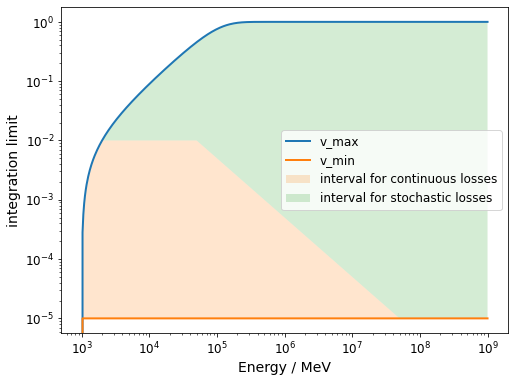

In [4]:
N_SAMPLE = 500
energies = np.geomspace(1e3, 1e9, N_SAMPLE)

vmax = calculate_vmax(energies)
vmin = calculate_vmin(energies)
cuts = np.empty(N_SAMPLE)

for i in range(N_SAMPLE):
    lims = pp.parametrization.KinematicLimits()
    lims.v_min = vmin[i]
    lims.v_max = vmax[i]
    cuts[i] = cut.cut(lims, energies[i])
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(energies, vmax, label="v_max")
ax.plot(energies, vmin, label="v_min")
zeros = np.zeros(N_SAMPLE)
cut_energies = cuts*energies
ax.fill_between(energies, vmin, cuts, facecolor='C1', alpha=0.2, label="interval for continuous losses")
ax.fill_between(energies, cuts, vmax, facecolor='C2', alpha=0.2, label="interval for stochastic losses")

plt.yscale("log")
plt.xscale("log")
plt.ylabel("integration limit")
plt.xlabel("Energy / MeV")
plt.legend(loc = "best")

### Special cases
We can define special cases for our energy cuts. If we want to use an $e_\mathrm{cut}$ only, we can set $v_\mathrm{cut} = 1$:

In [5]:
only_e_cut = pp.EnergyCutSettings(500, 1, True)

Similarly, if we want to use a $v_\mathrm{cut}$ only, we can set $e_\mathrm{cut} = \infty$:

In [6]:
only_v_cut = pp.EnergyCutSettings(np.inf, 0.05, True)

If we want to propagate only continuously, we can set both $e_\mathrm{cut}$ and $v_\mathrm{cut}$ to their maximum value:

In [7]:
only_stochastic = pp.EnergyCutSettings(np.inf, 1, True)